<a href="https://colab.research.google.com/github/pvdklei/modelsmakemodels/blob/master/pepijn/cifar10_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import visual_tools as vt
import importlib
import cv2
import torchvision 
import pandas as pd
from torchvision import datasets, transforms

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


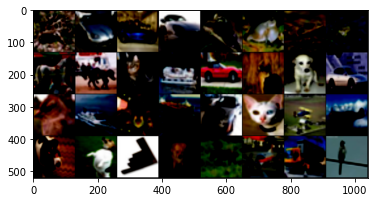

In [38]:
def showimage(image):
    image = image.numpy()
    image = image.transpose((1, 2, 0))
    plt.imshow(image)
images32 = torch.load("images32.tensor")
images1024 = torch.load("images1024.tensor")
labels1024 = torch.load("labels1024.tensor")
showimage(torchvision.utils.make_grid(images32))

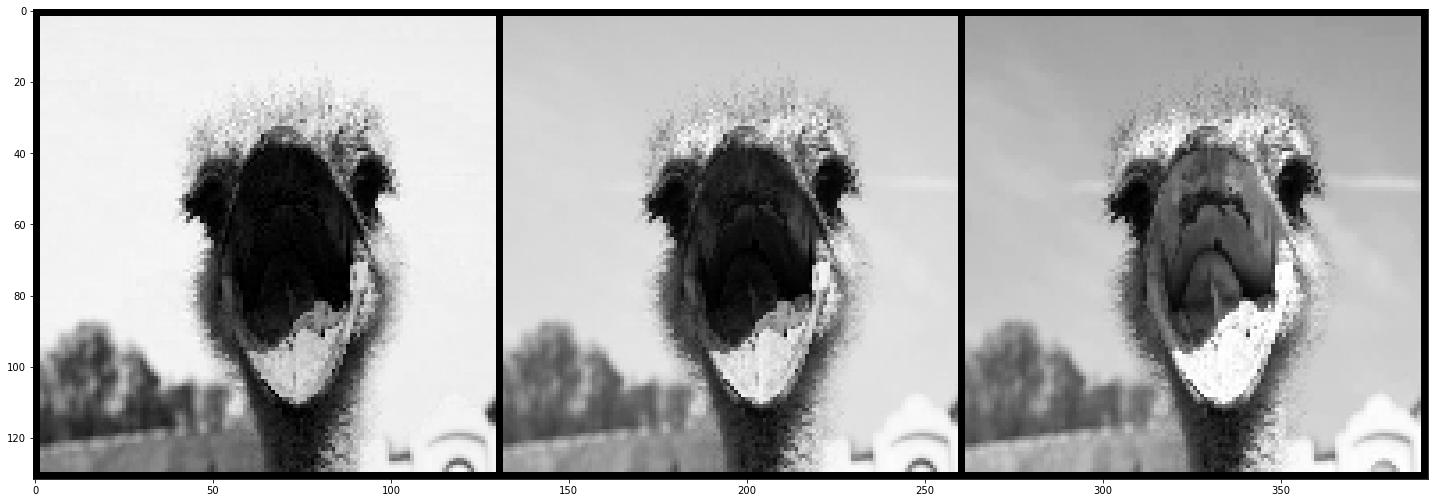

In [39]:
image = cv2.imread("struisvogel.jpg")
image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_CUBIC)
image = torch.from_numpy(image).permute(2, 0, 1).type(torch.FloatTensor)
vt.show_image_channels(image)

In [74]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(16 * 16 * 64, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        self.a = x
        x = self.pool(F.relu(self.conv2(x)))
        self.b = x
        x = self.pool(F.relu(self.conv3(x)))
        self.c = x
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        self.d = x
        x = F.relu(self.fc2(x))
        self.e = x
        x = self.fc3(x)
        return x

model = MyModel()
model.cpu()

MyModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout(p=0.2, inplace=False)
)

In [75]:
# load model
state_dict = torch.load("ninetynine.model", map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

original


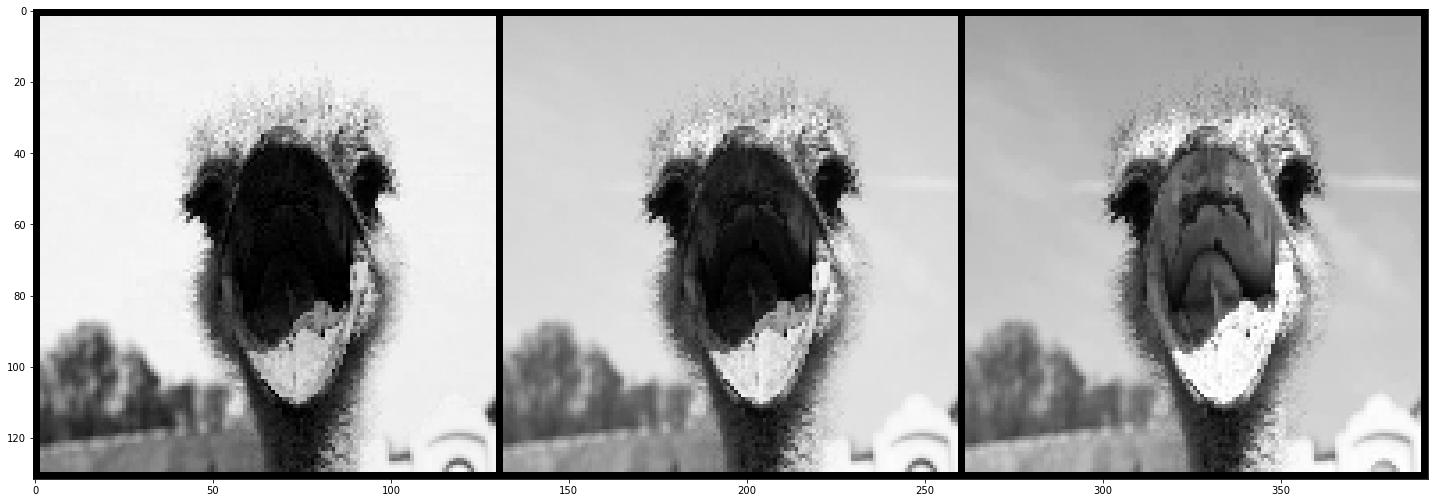

after some layer(s)


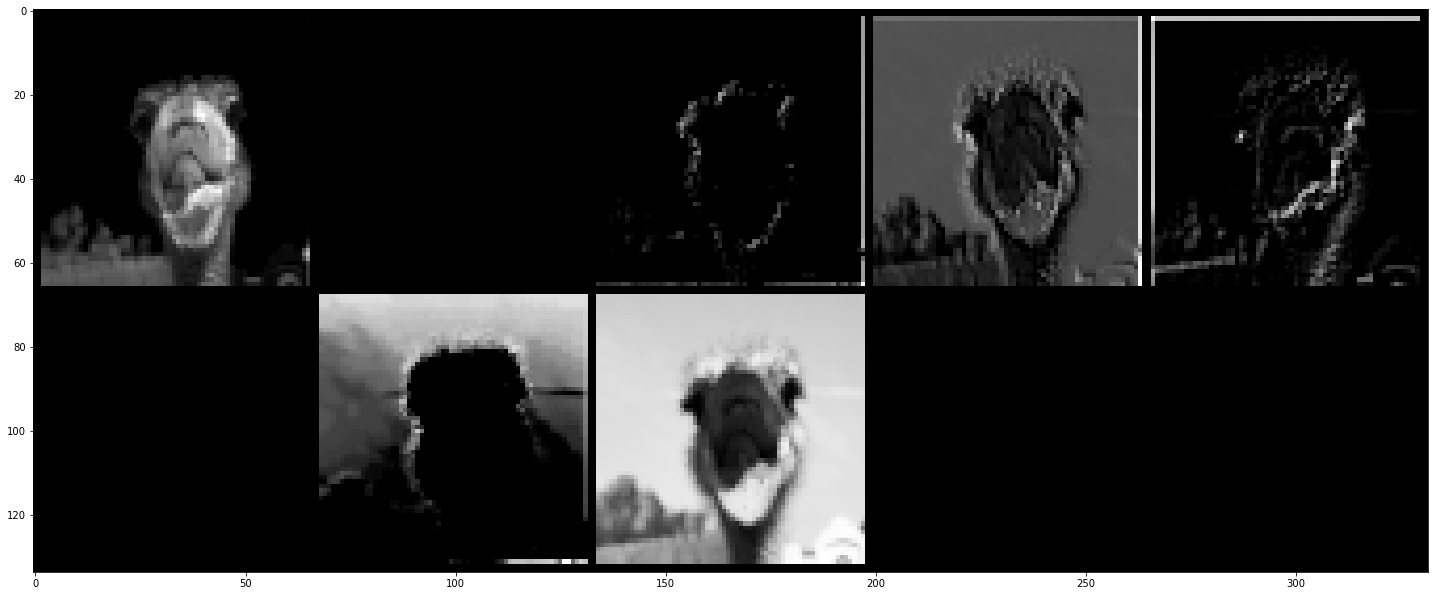

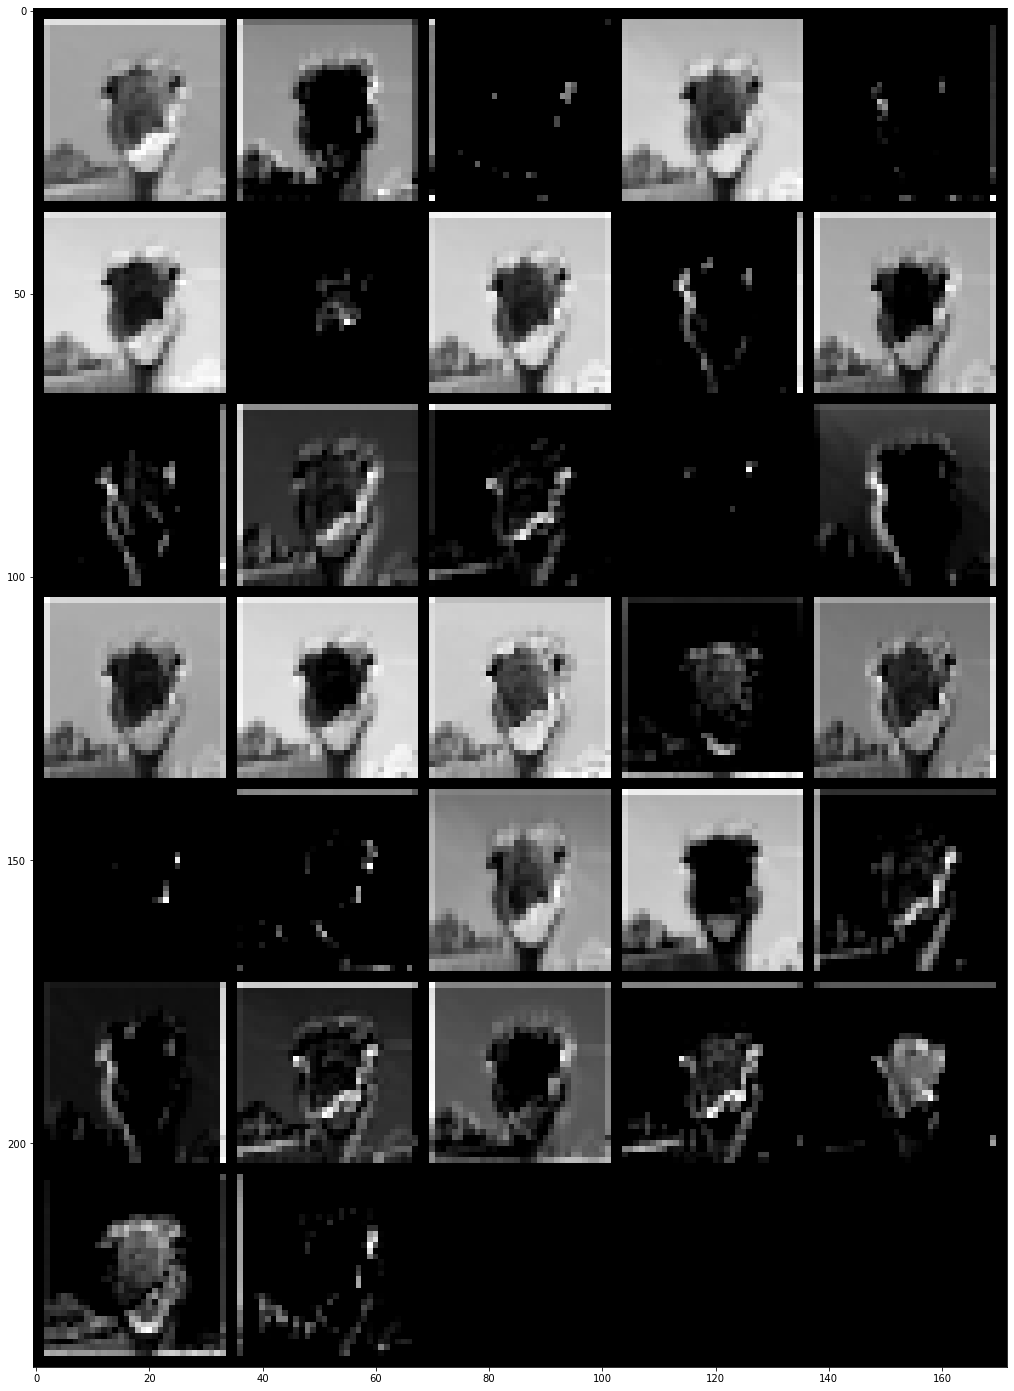

In [77]:
r = model(image.unsqueeze(0))
image_a = model.a
image_b = model.b

print("original")
vt.show_image_channels(image)
print("after some layer(s)")
vt.show_image_channels(image_a[0])
vt.show_image_channels(image_b[0])


In [137]:
import importlib 
importlib.reload(vt)

<module 'visual_tools' from '/Users/pepijnvanderklei/Desktop/LerenBeslissen/modelsmakemodels/pepijn/visual_tools.py'>

In [135]:
enlarged = transforms.Resize(128)(images1024)
r = model(enlarged)

In [ ]:
proj_og = vt.project2d(enlarged)
proj_a = vt.project2d(model.a)
print(proj_a.shape)
proj_b = vt.project2d(model.b)
proj_c = vt.project2d(model.c)
print(proj_c.shape)
proj_d = vt.project2d(model.d)
proj_e = vt.project2d(model.e)
proj_r = vt.tSNE(r)

(1024, 2)
(1024, 2)
